In [ ]:
stu_name = 'Mana Abbaszadeh'
stu_num = '400109638'

In this notebook, we are looking for the diagnosis of heart disease among patients using the [heart disease dataset](https://www.kaggle.com/johnsmith88/heart-disease-dataset). First, read the information about the different features, then answer the questions in each section using the attached data.

# Data

## Importing Libraries

In this notebook, you cannot use scikit learn and other libraries, except for those imported below.

In [461]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

Load dataset csv file into a data frame.

In [462]:
# TODO
df = pd.read_csv('heart.csv')

print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


## EDA

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. In this section, you should analyze the data. You can use the functions provided by the Pandas library. You can use analysis such as null checking of features, number of features and samples, and type of features. But don't stop there and search for it.


"My answer is dispalying some of the feature of this dataset to understand it better."

In [463]:
# TODO
"""
This code will display the general information about the dataset
like the number and the name of columns,
their data types,
the number of non-null values of each of the columns,
the number total number of each data type and
the memory usage for each column.
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [464]:
"""
Will display the number of missing values (null values) and also, the number of unique values in each column.
"""
null_values = df.isnull().sum()
unique_values = df.nunique()

info = pd.concat([null_values, unique_values], axis=1, keys=['Null counts', 'Unique Counts'])
print(info)

          Null counts  Unique Counts
age                 0             41
sex                 0              2
cp                  0              4
trestbps            0             49
chol                0            152
fbs                 0              2
restecg             0              3
thalach             0             91
exang               0              2
oldpeak             0             40
slope               0              3
ca                  0              5
thal                0              4
target              0              2


In [465]:
"""
Display the statistical information about the columns like count, mean, std, minimum, maximum, etc.
"""
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


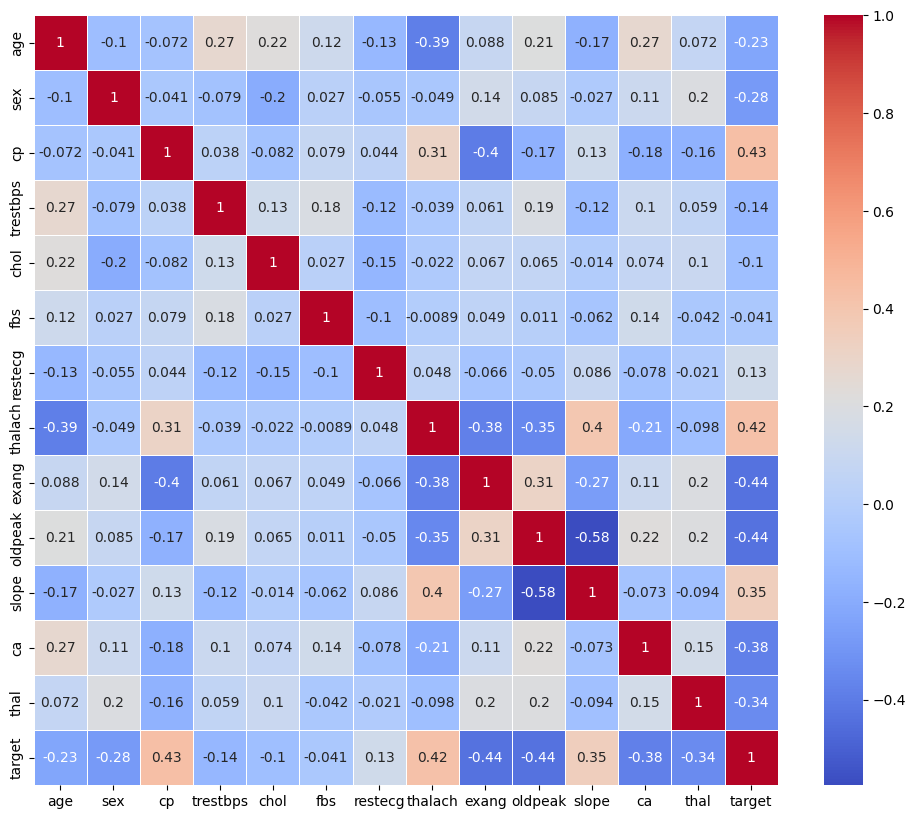

In [466]:
"""
Displey the correlation matrix
"""
plt.figure(figsize=(12, 10))

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()


## Analysis of Features

As you have probably noticed, in the dataset that you checked, some features are discrete and the rest are continuous. The following code specifies continuous and discrete features for you. **Note**: In the cells below, `df` is the same dataframe that you loaded in the previous section. You can change its name according to your code.

In [467]:
feature_list = [feature for feature in df.columns]
print("There are",len(feature_list),"features found in the data")

There are 14 features found in the data


In [468]:
#Print Discrete Feature Data
discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print("Discrete features are ",discrete_feature)

#Print Continuous Feature Data
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]
print("Continuous Variables Count: {}".format(len(cont_feature)))
print("Continuous features are ",cont_feature)

Discrete Variables Count: 9
Discrete features are  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous Variables Count: 5
Continuous features are  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# Perceptron

### Stochastic Gradient Descent

We will implement the perceptron algorithm in python 3 and numpy. The perceptron will learn using the stochastic gradient descent algorithm (SGD). Gradient Descent minimizes a function by following the gradients of the cost function.

### Calculating the Error

To calculate the error of a prediction we first need to define the objective function of the perceptron.

#### Hinge Loss Function

To do this, we need to define the loss function, to calculate the prediction error. We will use hinge loss for our perceptron:

$$c(x, y, f(x)) = (1 - y * f(x))_+$$

$c$ is the loss function, $x$ the sample, $y$ is the true label, $f(x)$ the predicted label.

This means the following:
$$
c(x, y, f(x))=
\begin{cases}
    0,& \text{if } y * f(x)\geq 1\\
    1-y*f(x),              & \text{else}
\end{cases}
$$

So consider, if y and f(x) are signed values $(+1,-1)$:

<ul>
    <li>the loss is 0, if $y*f(x)$ are positive, respective both values have the same sign.</li>
    <li>loss is $1-y*f(x)$ if $y*f(x)$ is negative</li>
</ul>

#### Objective Function

As we defined the loss function, we can now define the objective function for the perceptron:

$$l_i(w) = \big(-y_i \langle x_i,w \rangle\big)_+$$

We can write this without the dot product with a sum sign:

$$l_i(w) = (-y_i \sum_{i=1}^n x_iw)_+$$

So the sample $x_i$ is misclassified, if $y_i \langle x_i,w \rangle \leq 0$. The general goal is, to find the global minima of this function, respectively find a parameter $w$, where the error is zero.

#### Derive the Objective Function

To do this we need the gradients of the objective function. The gradient of a function $f$ is the vector of its partial derivatives. The gradient can be calculated by the partially derivative of the objective function.

$$ \nabla l_i(w) = -y_i x_i $$


This means, if we have a misclassified sample $x_i$, respectively $ y_i \langle x_i,w \rangle \leq 0 $, update the weight vector
$w$ by moving it in the direction of the misclassified sample.


$$w = w + y_i x_i$$

With this update rule in mind, we can start writing our perceptron algorithm in python.

## Model

Finally we can code our SGD algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

In [384]:
def perceptron_sgd(X, Y):
    '''
    # TODO: implement the below

    Initialize the weight vector for the perceptron with zeros
    Set the learning rate
    Set the number of epochs
    Iterate n times over the whole dataset.
    Iterate over each sample in the dataset
    Misclassification condition y_i * (x_i . w) <= 0
    Update rule for the weights w = w + y_i * x_i including the learning rate

    '''

    learning_rate = 0.01
    num_epochs = 1000
    w = np.zeros(X.shape[1])
    print(X.shape[0])
    print(len(X))
    for epoch in range(num_epochs):
      for i in range(X.shape[0]):
        x_i, y_i = X[i], Y[i]

        if y_i * (np.dot(x_i, w)) <= 0:
          w = w + learning_rate * y_i * x_i

    return w


### Let the Perceptron learn!

Next we can execute our code to train a classifier model. To see the learning progress of the perceptron, we add a plotting feature to our algorithm, counting the total error in each epoch.

In [396]:
def perceptron_sgd_plot(X, Y):
    '''
    TODO: train perceptron and plot the total loss in each epoch. You may not use the above perceptron_sgd(X, Y) function.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''

    # Your Implementation here
    learning_rate = 0.01
    num_epochs = 1500
    w = np.zeros(X.shape[1])

    errors = []

    for epoch in range(num_epochs):
        total_loss = 0
        for i in range(len(X)):
            x_i = X[i]
            y_i = Y[i]

            if y_i * np.dot(x_i, w) <= 0:
                w = w + learning_rate * y_i * x_i
                # missclassification
                total_loss += 1

        errors.append(total_loss)
        # Calculate average loss per sample
        # avg_loss = total_loss / len(X)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Perceptron Training Progress')
    plt.show()

    return w

In [397]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
Y = df.loc[:, "target"].to_numpy()

In [398]:
# TODO: Add a bias term -1 into the dataset. This is needed for the SGD to work.
for y in Y:
    if y == 0:
        y = -1
# add a -1 bias term to the end of each row
bias_column = -np.ones((Y.shape[0], 1))

# Concatenate the original X with the bias column
X = np.concatenate((X, bias_column), axis=1)

In [399]:
# TODO: Split the data to train and test with a 0.2 ratio
ratio = int(0.8 * len(X))
X_train, X_val, y_train, y_val = X[:ratio], X[ratio:], Y[:ratio], Y[ratio:]

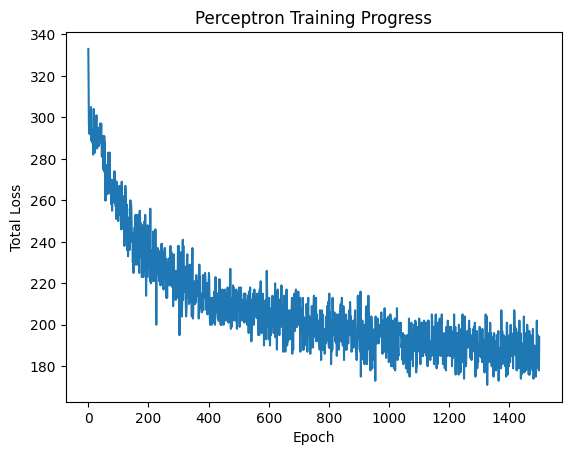

In [400]:
w = perceptron_sgd_plot(X_train,y_train)

### Accuracy


Implement the `accuracy_score` function by considering the predictions and true labels.

In [401]:
def accuracy_score(y_true, y_pred):
    #TODO: Your implementation
    correct = np.sum(y_true == y_pred)
    accuracy = (correct / len(y_true)) * 100
    return accuracy

Get the accuracy of your model using the function you implemented.

In [402]:
# TODO
predictions = np.sign(np.dot(X_val, w))
print(accuracy_score(y_val, predictions))

80.0


### Confusion Matrix

Implement the `confusion_matrix` function to generate the confusion matrix by receiving the predicted labels, the real labels and the labels themselves.

In [403]:
def confusion_matrix(actual, predicted, labels):
    # TODO: Initialize the confusion matrix
    num_possible_labels = len(labels)
    matrix = np.zeros((num_possible_labels, num_possible_labels), dtype=int)

    # TODO: Populate the confusion matrix
    for act, pred in zip(actual, predicted):
        matrix[labels.index(act), labels.index(pred)] += 1

    return matrix

Implement the following function to plot the confusion matrix obtained from the previous part.

In [404]:
def plot_confusion_matrix(matrix, labels):
    #TODO: plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, cmap='viridis', fmt='d', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.show()

Now plot the confusion matrix for your model:

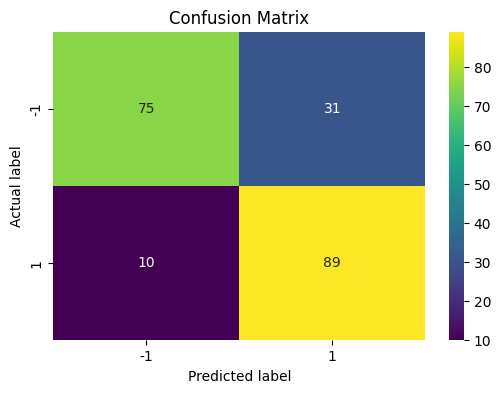

In [405]:
# TODO
labels = [-1, 1]  # Assume labels are 1 or -1
cm = confusion_matrix(y_val, predictions, labels)
plot_confusion_matrix(cm, labels)

### F1 Score

Implement the following functions to calculate precision, recall and [F1 score](https://en.wikipedia.org/wiki/F-score) using confusion matrix. Then calculate all three metrics for your model.

In [406]:
# Set the confusion matrix elements
true_neg = cm[0, 0]
false_pos = cm[0, 1]
false_neg = cm[1, 0]
true_pos = cm[1, 1]

In [407]:
def recall_score(cm):
  #TODO: return the recall score
  '''
  recall = true_pos / (true_pos + false_neg)
  '''
  true_pos = cm[1, 1]
  false_neg = cm[1, 0]
  s = true_pos + false_neg
  if s != 0:
    recall = true_pos / s
    return recall * 100

  return None

print(recall_score(cm))

89.8989898989899


In [408]:
def precision_score(cm):
  #TODO: return the precision score
  '''
  precision = true_pos / (true_pos + false_pos)
  '''
  true_pos = cm[1, 1]
  false_pos = cm[0, 1]
  s = true_pos + false_pos
  if s != 0:
    precision = true_pos / s
    return precision * 100

  return None

print(precision_score(cm))

74.16666666666667


In [409]:
def f1_score(cm):
  #TODO: return the f1 score
  '''
  f1_score = 2 * (precision * recall) / (precision + recall)
  '''
  precision = precision_score(cm)
  recall = recall_score(cm)
  s = precision + recall
  if s != 0:
    f1_score = 2 * (precision * recall) / s
    return f1_score

  return None

print(f1_score(cm))

81.27853881278538


# Naive Bayes

## Model

To predict the target column we want to use a Naive Bayes classifier. In this section, you must implement the functions of the `MixedDataNB` class. Assume continuous features follow a normal distribution. **Hint**: You need to train a Naive Bayes model that implements the likelihood function for categorical and continuous values in two different ways. Search for Gaussian NB and Multinomial NB. **Note**: Please feel free to modify the following class and its functions.

In [410]:
class MixedDataNB:
    def __init__(self):
        self.prior = None
        self.cont = {}
        self.features = {}

    def fit(self, X, y):
        self.prior = np.bincount(y) / len(y)
        unique_classes = np.unique(y)

        for unqc in unique_classes:
            idx = (y == unqc)
            X_i = X[idx]

            self.cont[unqc] = {'mean': None, 'var': None}
            self.cont[unqc]['mean'] = np.mean(X_i, axis=0)
            self.cont[unqc]['var'] = np.var(X_i, axis=0)

            self.features[unqc] = {}

            num_features = len(X_i[0])
            for i in range(num_features):
                vals_array, occurr_count = np.unique(X_i[:, i], return_counts=True)
                # A dictionary for each unique value from the values array which is mapped to its corresponding count
                self.features[unqc][i] = dict(zip(vals_array, occurr_count / len(X_i)))

    def calculate_likelihood(self, idx, sample):
      variance = self.cont[idx]['var']
      mean = self.cont[idx]['mean']
      return np.sum(-0.5 * np.log(2 * np.pi * variance) - 0.5 * ((sample - mean) ** 2) / variance)

    def calculate_cat_likelihood(self, idx, sample):
      log_sum = 0
      for i, val in enumerate(sample):
          if val in self.features[idx][i]:
              log_sum += np.log(self.features[idx][i][val])
          else:
              log_sum += np.log(1e-6) # Missing value
      return log_sum

    def predict(self, X):
        predictions = []

        for sample in X:
            preds = []
            for i, prior in enumerate(self.prior):
                prior_log = np.log(prior)
                likelihood = self.calculate_likelihood(i, sample)
                cat_likelihood = self.calculate_cat_likelihood(i, sample)
                preds.append(likelihood + cat_likelihood + prior_log)

            predictions.append(np.argmax(preds))

        return predictions


## Train and Validation


### Data splitting

Split the training and validation data. Separate 20% of the data for validation.

In [411]:
df = pd.read_csv("heart.csv")

X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()

In [412]:
# TODO
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# The accuracy will be around %87 if we split the data like this:
# ratio = int(0.8 * len(X))
# X_train, X_val, y_train, y_val = X[:ratio], X[ratio:], y[:ratio], y[ratio:]

### Model training

In [413]:
# TODO
model = MixedDataNB()
model.fit(X_train, y_train)

### Make predictions

In [414]:
# TODO
predictions = model.predict(X_val)

### Accuracy

Get the accuracy of your model using the function you implemented.

In [415]:
print(accuracy_score(y_val, predictions))

92.6829268292683


### Confusion Matrix

Now, using the functions you wrote, plot the confusion matrix for the model you trained.

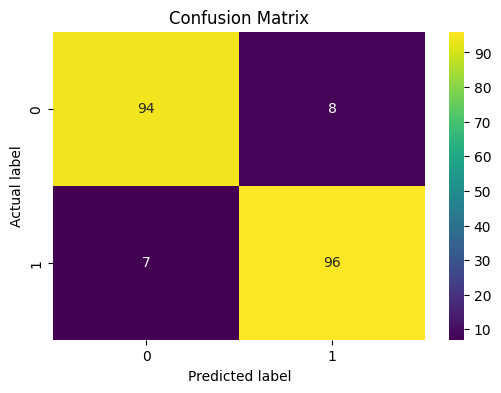

In [416]:
# TODO
labels = [0, 1]
cm = confusion_matrix(y_val, predictions, labels)
plot_confusion_matrix(cm, labels)

### F1 Score

Using your implemented functions in the previous section, calculate precision, recall and F1 score using confusion matrix. Then calculate all three metrics for your model.

In [417]:
print(recall_score(cm))

93.20388349514563


In [418]:
print(precision_score(cm))

92.3076923076923


In [419]:
print(f1_score(cm))

92.7536231884058


### Heatmap

By ploting the heatmap obtained for chol and oldpeak features from your model, compare the usefulness of these two features.


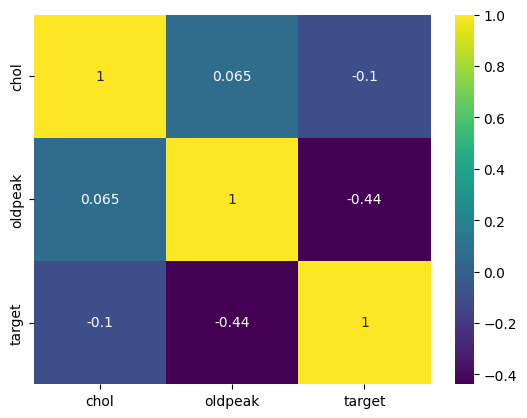

In [420]:
sns.heatmap(df[['chol', 'oldpeak', 'target']].corr(), annot=True, cmap='viridis')
plt.show()

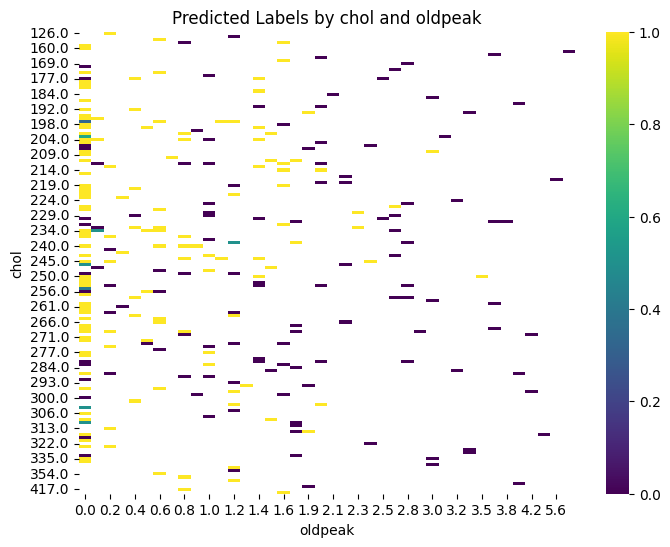

In [421]:
# TODO
predictions = model.predict(X_train)

if len(predictions) == len(X_train):
    df_heatmap = pd.DataFrame({'Predicted': predictions, 'chol': X_train[:, 10], 'oldpeak': X_train[:, 12]})
    plt.figure(figsize=(8, 6))
    heatmap = sns.heatmap(df_heatmap.pivot_table(index='chol', columns='oldpeak', values='Predicted', aggfunc='mean'), cmap='viridis')
    heatmap.set_title('Predicted Labels by chol and oldpeak')
    plt.show()
else:
    print("Length mismatch!")

Train your model once by removing the chol feature and once by removing the oldpeak feature and calculate its accuracy. Compare the obtained results with the previous part.

Remove Chol and test model

In [422]:
# TODO
from sklearn.model_selection import train_test_split

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(np.delete(X, 10, axis=1), y, test_size=0.2, random_state=42)

model = MixedDataNB()
model.fit(new_X_train, y_train)
new_prediction = model.predict(new_X_test)
print(f'Accuracy without chol: {accuracy_score(new_y_test, new_prediction)}')

Accuracy without chol: 87.3170731707317


Remove oldpeak and test model

In [423]:
# TODO
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(np.delete(X, 12, axis=1), y, test_size=0.2, random_state=42)
model = MixedDataNB()
model.fit(new_X_train, y_train)
new_prediction = model.predict(new_X_test)
print(f'Accuracy without oldpeak: {accuracy_score(new_y_test, new_prediction)}')

Accuracy without oldpeak: 91.70731707317074


Comparison

**Answer:**

At first, the accuracy was 92%. Removing chol caused a significant decrease in accuracy but removing oldpeak caused less negative effect on accuracy. Overall, removing chol and oldpeak negatively affected the accuracy, but the negative effect of removing chol was more than the negative effect of removing oldpeak.  

# Comparison

Which model did better: the perceptron or the Naive Bayes model? What factors do you think influenced the difference in their performance?

### Answer:

We saw that the accuracy of perceptron was 79% while the accuracy of Naive Bayes was 92%. So Naive Bayes did much more better than the perceptron and had a better performance. Also we can see this difference comparing the f1 score of these two models.

Naive Bayes model will perform better when the features are conditionally independent. Also, the performance of both models can be affected by the size and quality of the training dataset. When the dataset is small, Naive Bayes performs better than perceptron, so perceptron requires more data to generalize better. Naive Bayes works better for complex and nonlinear data than perceptron.

# Imbalanced Data

By using the model you designed and the functions you implemented, train your model on the three imbalanced data sets provided to you and calculate accuracy, recall, precision, and F1 score metrics for it each time. The confusion matrix should also be plotted each time. Finally, analyze based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets. **Note:** In order to prevent code duplication, you are free to define functions and only use them with different datasets.

## First dataset

### Load data

In [438]:
def load_data(file_path):
  return pd.read_csv(file_path)

def find_distribution(df):
  target_distribution = df['target'].value_counts()
  print(target_distribution)

def split_data(df):
  X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].values
  y = df['target'].values
  return train_test_split(X, y, test_size=0.2, random_state=42)

def train(X_train, y_train, X_val):
  model = MixedDataNB()
  model.fit(X_train, y_train)
  return model.predict(X_val)

def plot_cm(y_val, predictions):
  labels = [0, 1]
  cm = confusion_matrix(y_val, predictions, labels)
  plot_confusion_matrix(cm, labels)
  return cm

def calculate_metrics(y_val, predictions, cm):
  print(f'Accuracy: {accuracy_score(y_val, predictions)}')
  print(f'Recall: {recall_score(cm)}')
  print(f'Precision: {precision_score(cm)}')
  print(f'F1 score: {f1_score(cm)}')

In [439]:
df1 = load_data("1.csv")
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Find the distribution


Find the number of samples from each target label.

In [440]:
# TODO
find_distribution(df1)

0    499
1    226
Name: target, dtype: int64


### Split data

In [441]:
# TODO
X_train, X_val, y_train, y_val = split_data(df1)

### Train model and make predictions

In [442]:
# TODO
predictions = train(X_train, y_train, X_val)

### Plot confusion matrix

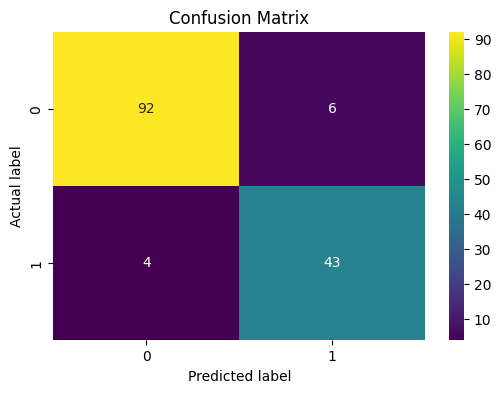

In [444]:
#TODO
cm = plot_cm(y_val, predictions)

### Calculate metrics

In [445]:
# TODO
calculate_metrics(y_val, predictions, cm)

Accuracy: 93.10344827586206
Recall: 91.48936170212765
Precision: 87.75510204081633
F1 score: 89.58333333333331


## Second dataset

### Load data

In [447]:
df2 = load_data("2.csv")
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Find the distribution


Find the number of samples from each target label.

In [449]:
# TODO
find_distribution(df2)

0    499
1    126
Name: target, dtype: int64


### Split data

In [451]:
# TODO
X_train, X_val, y_train, y_val = split_data(df2)

### Train model and make predictions

In [452]:
# TODO
predictions = train(X_train, y_train, X_val)

### Plot confusion matrix

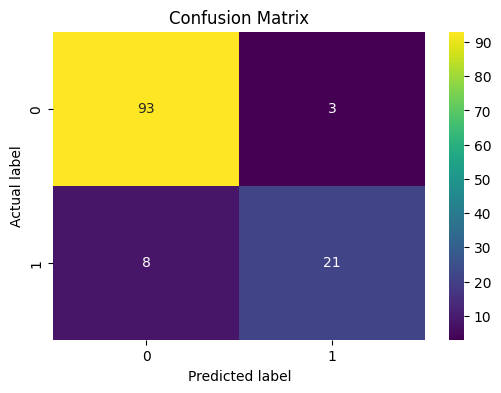

In [453]:
#TODO
cm = plot_cm(y_val, predictions)

### Calculate metrics

In [454]:
# TODO
calculate_metrics(y_val, predictions, cm)

Accuracy: 91.2
Recall: 72.41379310344827
Precision: 87.5
F1 score: 79.24528301886792


## Third dataset

### Load data

In [455]:
df3 = load_data("3.csv")
df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Find the distribution


Find the number of samples from each target label.

In [456]:
# TODO# TODO
find_distribution(df3)

0    499
1     26
Name: target, dtype: int64


### Split data

In [457]:
# TODO
X_train, X_val, y_train, y_val = split_data(df3)

### Train model and make predictions

In [458]:
# TODO
predictions = train(X_train, y_train, X_val)

### Plot confusion matrix

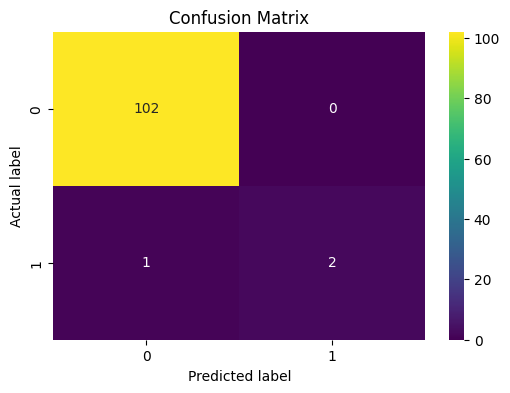

In [459]:
#TODO
cm = plot_cm(y_val, predictions)

### Calculate metrics

In [460]:
# TODO
calculate_metrics(y_val, predictions, cm)

Accuracy: 99.04761904761905
Recall: 66.66666666666666
Precision: 100.0
F1 score: 80.0


## Comparison

Based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets?

**Answer:**

In imbalanced datasets, we should use F1 score, precision, and recall to evaluate our model compared to accuracy alone. In a balanced dataset, the model has an equal opportunity to learn from both precision and recall classes and it improves both classes. Also, in these models, the f1 score decreases while the accuracy score increases.